In [246]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.options.display.max_columns = 9999

In [247]:
lista_dir = os.listdir()

In [248]:
lista_dir = [x for x in lista_dir if '.csv' in x]

In [249]:
lista_dir

['FURTO DE CELULAR.csv',
 'FURTO DE VEÍCULOS.csv',
 'HOMICÍDIO DOLOSO.csv',
 'IML.csv',
 'LATROCÍNIO.csv',
 'LESÃO CORPORAL DOLOSA SEGUIDA DE MORTE.csv',
 'MORTE DECORRENTE DE INTERVENÇÃO POLICIAL.csv',
 'ROUBO DE CELULAR.csv',
 'ROUBO DE VEÍCULOS.csv']

In [250]:
df = pd.DataFrame()
lista_dir = ['FURTO DE CELULAR.csv',
             'FURTO DE VEÍCULOS.csv',
             'ROUBO DE CELULAR.csv',
             'ROUBO DE VEÍCULOS.csv']
for i in lista_dir:
    
    df2 = pd.read_csv(i,engine='python')
    tipo = i.split('.')[0]
    print(i)
    df2 = df2[['DATAOCORRENCIA','LATITUDE','LONGITUDE','PERIDOOCORRENCIA','NUM_BO','BO_INICIADO']]
    df2['TIPO'] = tipo
    df = df.append(df2).reset_index(drop=True)

FURTO DE CELULAR.csv
FURTO DE VEÍCULOS.csv
ROUBO DE CELULAR.csv
ROUBO DE VEÍCULOS.csv


In [251]:
df = df.drop_duplicates()

In [252]:
df.sample(5)

,DATAOCORRENCIA,LATITUDE,LONGITUDE,PERIDOOCORRENCIA,NUM_BO,BO_INICIADO,TIPO
142880,2017-08-07 00:00:00,-23.5483585133881,-46.9004867817194,A NOITE,2816,2017-08-08 16:31:02,FURTO DE CELULAR
1153324,24/09/2018,"-23,5608064381525","-46,634795638339",A NOITE,4294,25/09/2018 09:30:18,ROUBO DE CELULAR
42001,2017-10-26 00:00:00,-23.162579337,-46.446866159,A TARDE,1583824,2017-11-27 16:51:44,FURTO DE CELULAR
1426982,30/07/2018,"-23,4194602091043","-46,5821038893915",PELA MANHÃƒ,7621,30/07/2018 10:29:59,ROUBO DE VEÍCULOS
695032,2017-02-06 00:00:00,NaN,NaN,A NOITE,1100,2017-02-07 10:55:15,ROUBO DE CELULAR


In [253]:
def arrumar_data(x):
    try:
        if len(x) < 11:
            x = pd.to_datetime(x)
        else:
            x = pd.to_datetime(x[:10])
        return x
    except:
        return np.nan 

In [254]:
def arrumar_coord(x):
    try:
        return float(x)
    except:
        return float(x.replace(',','.'))

In [255]:
df['LATITUDE'] = df['LATITUDE'].apply(arrumar_coord)
df['LONGITUDE'] = df['LONGITUDE'].apply(arrumar_coord)

In [256]:
df['DATAOCORRENCIA'] = df['DATAOCORRENCIA'].apply(arrumar_data)

In [257]:
df['BO_INICIADO'] = pd.to_datetime(df['BO_INICIADO'])

In [258]:
df.sample(10)

,DATAOCORRENCIA,LATITUDE,LONGITUDE,PERIDOOCORRENCIA,NUM_BO,BO_INICIADO,TIPO
156535,2017-09-02,-20.507241,-47.399743,A TARDE,3506,2017-09-04 10:09:14,FURTO DE CELULAR
409772,2017-04-12,-22.757417,-47.413345,A NOITE,516758,2017-04-12 20:54:02,FURTO DE VEÍCULOS
651835,2017-11-06,-23.942921,-46.325099,A NOITE,1487338,2017-11-07 08:01:57,ROUBO DE CELULAR
1083140,2018-06-21,-23.654960,-46.430965,A TARDE,3930,2018-06-21 18:39:16,ROUBO DE CELULAR
1370910,2018-11-03,-21.139649,-47.830857,A NOITE,5691,2018-12-03 01:12:14,ROUBO DE VEÍCULOS
439073,2017-06-25,-23.965373,-46.318906,A TARDE,2750,2017-06-25 18:45:33,FURTO DE VEÍCULOS
535319,2018-04-26,-22.754125,-47.415156,A TARDE,554322,2018-04-27 09:44:13,FURTO DE VEÍCULOS
120268,2017-06-18,-23.557431,-46.660923,A TARDE,852850,2017-06-23 17:25:44,FURTO DE CELULAR
1429307,2018-05-08,-22.986901,-47.119577,DE MADRUGADA,1186,2018-05-08 00:42:20,ROUBO DE VEÍCULOS
1378092,2018-03-29,-23.071267,-46.640931,PELA MANHÃƒ,2451,2018-03-29 18:15:54,ROUBO DE VEÍCULOS


In [259]:
df = df[(df['LATITUDE'].notnull()) & (df['DATAOCORRENCIA']).notnull()]

In [260]:
df.head()

,DATAOCORRENCIA,LATITUDE,LONGITUDE,PERIDOOCORRENCIA,NUM_BO,BO_INICIADO,TIPO
0,2017-01-01,-23.559153,-46.658927,DE MADRUGADA,1,2017-01-01 00:28:58,FURTO DE CELULAR
1,2017-01-01,-20.522797,-47.372208,DE MADRUGADA,4,2017-01-01 02:05:37,FURTO DE CELULAR
2,2017-01-01,-21.203052,-47.849607,EM HORA INCERTA,1,2017-01-01 03:24:38,FURTO DE CELULAR
3,2016-12-31,-23.538027,-46.641257,A NOITE,4,2017-01-01 03:22:21,FURTO DE CELULAR
4,2017-01-01,-23.627634,-45.417505,EM HORA INCERTA,2,2017-01-01 03:28:30,FURTO DE CELULAR


In [261]:
df['PERIDOOCORRENCIA'].unique()

array(['DE MADRUGADA', 'EM HORA INCERTA', 'A NOITE', 'A TARDE',
       'PELA MANHÃƒ'], dtype=object)

In [262]:
df['PERIDOOCORRENCIA'] = df['PERIDOOCORRENCIA'].replace('PELA MANHÃƒ','PELA MANHÃ')

In [263]:
df['ANOMES'] = df['BO_INICIADO'].dt.year*100 + df['BO_INICIADO'].dt.month

In [264]:
df = df[(df['ANOMES'] >= 201701) & (df['ANOMES'] <= 201810)]

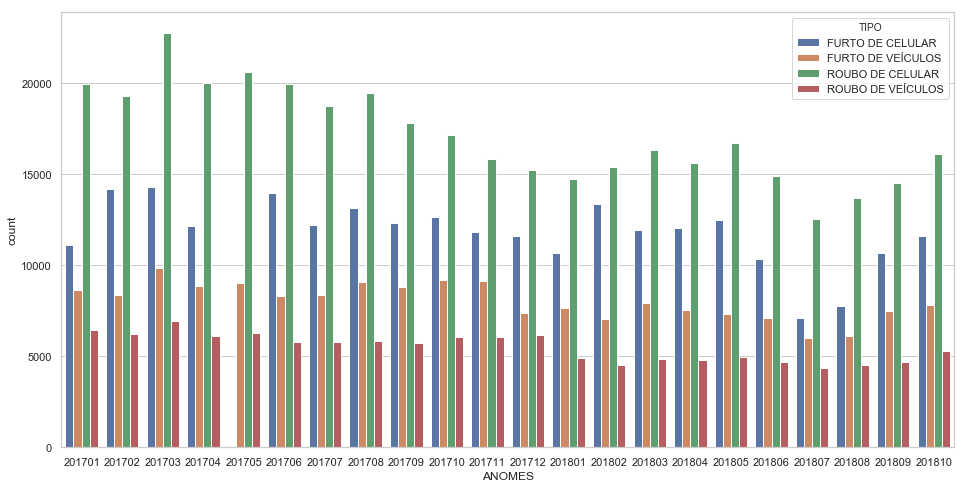

In [265]:
fig, ax = plt.subplots(1,1,figsize=(16,8))
ax = sns.countplot(x='ANOMES',hue='TIPO',data=df)

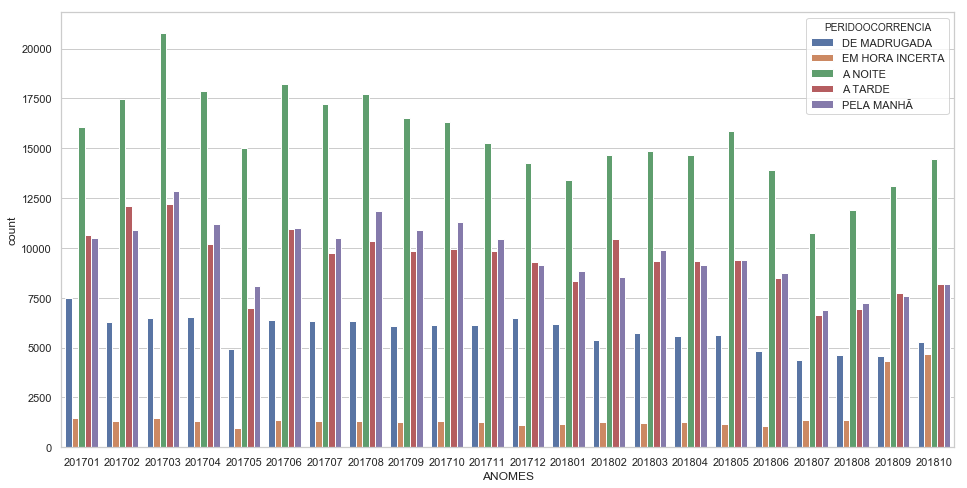

In [266]:
fig, ax = plt.subplots(1,1,figsize=(16,8))
ax = sns.countplot(x='ANOMES',hue='PERIDOOCORRENCIA',data=df)

C:\Users\Administrator\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


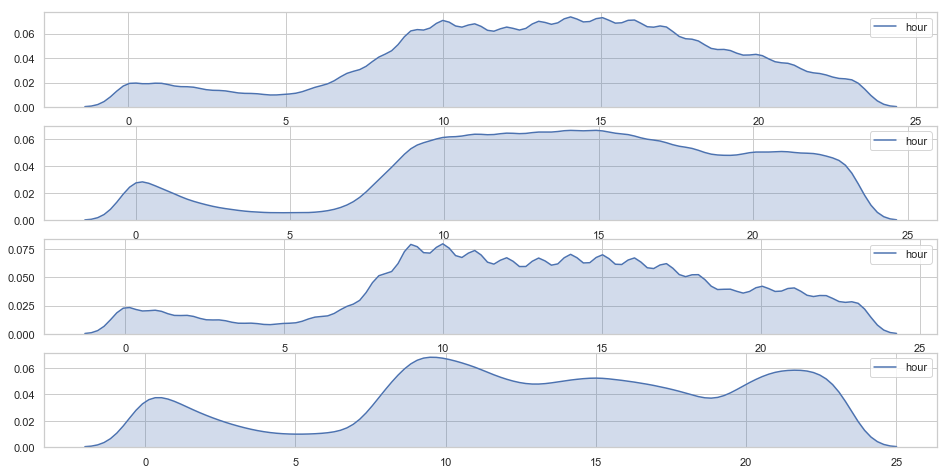

In [267]:
df['hour'] = df['BO_INICIADO'].dt.hour
fig, ax = plt.subplots(4,1,figsize=(16,8))

c = 0
for n in df['TIPO'].unique():
    df_filter = df[df['TIPO'] == n]
    sns.kdeplot(df_filter['hour'],ax=ax[c],shade=True)
    c+=1
    

In [268]:
df2 = pd.get_dummies(df,columns=['TIPO','PERIDOOCORRENCIA'])

In [269]:
df2.columns

Index(['DATAOCORRENCIA', 'LATITUDE', 'LONGITUDE', 'NUM_BO', 'BO_INICIADO',
       'ANOMES', 'hour', 'TIPO_FURTO DE CELULAR', 'TIPO_FURTO DE VEÍCULOS',
       'TIPO_ROUBO DE CELULAR', 'TIPO_ROUBO DE VEÍCULOS',
       'PERIDOOCORRENCIA_A NOITE', 'PERIDOOCORRENCIA_A TARDE',
       'PERIDOOCORRENCIA_DE MADRUGADA', 'PERIDOOCORRENCIA_EM HORA INCERTA',
       'PERIDOOCORRENCIA_PELA MANHÃ'],
      dtype='object')

In [270]:
#### KNN

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)

kmeans.fit(df[['LATITUDE','LONGITUDE']])
df2['CLUSTER'] = kmeans.predict(df2[['LATITUDE','LONGITUDE']])

In [271]:
df2['CLUSTER'] = df2['CLUSTER'].astype(str)
df2['CLUSTER'] = df2['CLUSTER'].replace('0','A')
df2['CLUSTER'] = df2['CLUSTER'].replace('1','B')
df2['CLUSTER'] = df2['CLUSTER'].replace('2','C')
df2['CLUSTER'] = df2['CLUSTER'].replace('3','D')
df2['CLUSTER'] = df2['CLUSTER'].replace('4','E')

In [272]:
apoio = df2.groupby('CLUSTER').agg({'TIPO_FURTO DE CELULAR':'sum',
                      'TIPO_FURTO DE VEÍCULOS':'sum',
                       'TIPO_ROUBO DE CELULAR':'sum',
                       'TIPO_ROUBO DE VEÍCULOS':'sum',
                       'PERIDOOCORRENCIA_A NOITE':'sum',
                       'PERIDOOCORRENCIA_A TARDE':'sum',
                       'PERIDOOCORRENCIA_DE MADRUGADA':'sum',
                       'PERIDOOCORRENCIA_EM HORA INCERTA':'sum',
                       'PERIDOOCORRENCIA_PELA MANHÃ':'sum'
                        }).reset_index()

apoio['total'] = apoio[['TIPO_FURTO DE CELULAR', 'TIPO_FURTO DE VEÍCULOS',
                        'TIPO_ROUBO DE CELULAR', 'TIPO_ROUBO DE VEÍCULOS']].sum(1)

In [273]:
for i in ['TIPO_FURTO DE CELULAR', 'TIPO_FURTO DE VEÍCULOS',
                        'TIPO_ROUBO DE CELULAR', 'TIPO_ROUBO DE VEÍCULOS',
                     'PERIDOOCORRENCIA_A NOITE', 'PERIDOOCORRENCIA_A TARDE',
                       'PERIDOOCORRENCIA_DE MADRUGADA', 'PERIDOOCORRENCIA_EM HORA INCERTA',
                       'PERIDOOCORRENCIA_PELA MANHÃ']:
    apoio['PERC_'+i] = apoio[i]/apoio['total']*100

In [274]:
apoio

,CLUSTER,TIPO_FURTO DE CELULAR,TIPO_FURTO DE VEÍCULOS,TIPO_ROUBO DE CELULAR,TIPO_ROUBO DE VEÍCULOS,PERIDOOCORRENCIA_A NOITE,PERIDOOCORRENCIA_A TARDE,PERIDOOCORRENCIA_DE MADRUGADA,PERIDOOCORRENCIA_EM HORA INCERTA,PERIDOOCORRENCIA_PELA MANHÃ,total,PERC_TIPO_FURTO DE CELULAR,PERC_TIPO_FURTO DE VEÍCULOS,PERC_TIPO_ROUBO DE CELULAR,PERC_TIPO_ROUBO DE VEÍCULOS,PERC_PERIDOOCORRENCIA_A NOITE,PERC_PERIDOOCORRENCIA_A TARDE,PERC_PERIDOOCORRENCIA_DE MADRUGADA,PERC_PERIDOOCORRENCIA_EM HORA INCERTA,PERC_PERIDOOCORRENCIA_PELA MANHÃ
0,A,8966.0,8094.0,10744.0,3351.0,11270.0,7197.0,4418.0,1365.0,6905.0,31155.0,28.778687,25.979779,34.485636,10.755898,36.173969,23.100626,14.180709,4.381319,22.163377
1,B,14638.0,9850.0,9678.0,2983.0,12621.0,8363.0,6250.0,3124.0,6791.0,37149.0,39.403483,26.514846,26.051845,8.029826,33.973997,22.512046,16.824141,8.409378,18.280438
2,C,26395.0,29915.0,30232.0,14426.0,35603.0,22961.0,13210.0,4862.0,24332.0,100968.0,26.141946,29.628199,29.942160,14.287695,35.261667,22.740868,13.083353,4.815387,24.098724
3,D,15184.0,7571.0,4907.0,771.0,9425.0,6563.0,5146.0,2068.0,5231.0,28433.0,53.402736,26.627510,17.258116,2.711638,33.148103,23.082334,18.098688,7.273239,18.397637
4,E,182254.0,121642.0,321672.0,99561.0,271534.0,161881.0,98833.0,22956.0,169925.0,725129.0,25.134011,16.775222,44.360659,13.730109,37.446303,22.324442,13.629713,3.165782,23.433761


In [290]:
sns.set(font_scale=1.1)

Text(0,0.5,'Longitude')

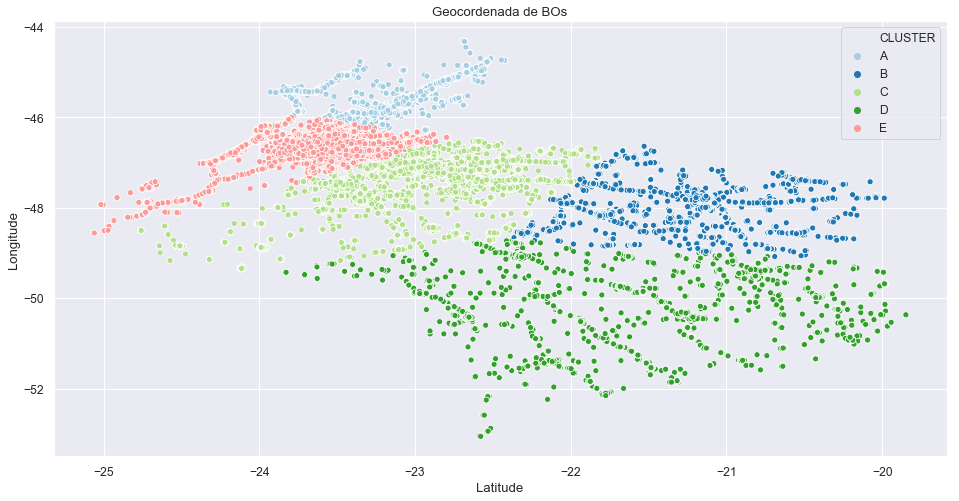

In [293]:
fig, ax = plt.subplots(1,1,figsize=(16,8))
ax.set_title('Geocordenada de BOs')
ax = sns.scatterplot(x='LATITUDE',y='LONGITUDE',
                     hue='CLUSTER',data=df2,
                     palette="Paired",
                     hue_order=['A','B','C','D','E'])
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')

In [276]:
df2['hour'] = df2['BO_INICIADO'].dt.hour

In [277]:
apoio.columns

Index(['CLUSTER', 'TIPO_FURTO DE CELULAR', 'TIPO_FURTO DE VEÍCULOS',
       'TIPO_ROUBO DE CELULAR', 'TIPO_ROUBO DE VEÍCULOS',
       'PERIDOOCORRENCIA_A NOITE', 'PERIDOOCORRENCIA_A TARDE',
       'PERIDOOCORRENCIA_DE MADRUGADA', 'PERIDOOCORRENCIA_EM HORA INCERTA',
       'PERIDOOCORRENCIA_PELA MANHÃ', 'total', 'PERC_TIPO_FURTO DE CELULAR',
       'PERC_TIPO_FURTO DE VEÍCULOS', 'PERC_TIPO_ROUBO DE CELULAR',
       'PERC_TIPO_ROUBO DE VEÍCULOS', 'PERC_PERIDOOCORRENCIA_A NOITE',
       'PERC_PERIDOOCORRENCIA_A TARDE', 'PERC_PERIDOOCORRENCIA_DE MADRUGADA',
       'PERC_PERIDOOCORRENCIA_EM HORA INCERTA',
       'PERC_PERIDOOCORRENCIA_PELA MANHÃ'],
      dtype='object')

In [283]:
sns.set(style="whitegrid")

Text(0.5,1,'OCORRENCIAS DE MADRUGADA SOBRE O TOTAL')

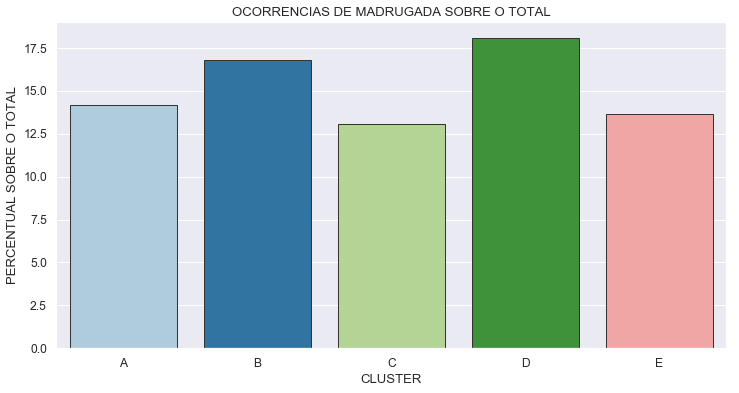

In [294]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

sns.barplot(x='CLUSTER',y='PERC_PERIDOOCORRENCIA_DE MADRUGADA',data = apoio,ax=ax,edgecolor=".2",
             palette="Paired")
ax.set_ylabel('PERCENTUAL SOBRE O TOTAL')
ax.set_title('OCORRENCIAS DE MADRUGADA SOBRE O TOTAL')

Text(0.5,1,'OCORRENCIAS DE MANHÃ SOBRE O TOTAL')

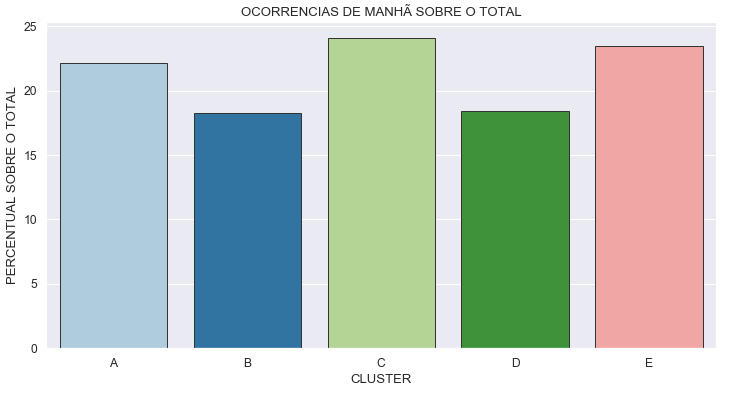

In [295]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

sns.barplot(x='CLUSTER',y='PERC_PERIDOOCORRENCIA_PELA MANHÃ',data = apoio,ax=ax,edgecolor=".2",
             palette="Paired")
ax.set_ylabel('PERCENTUAL SOBRE O TOTAL')
ax.set_title('OCORRENCIAS DE MANHÃ SOBRE O TOTAL')

Text(0.5,1,'OCORRENCIAS DE FURTO DE CELULAR SOBRE O TOTAL')

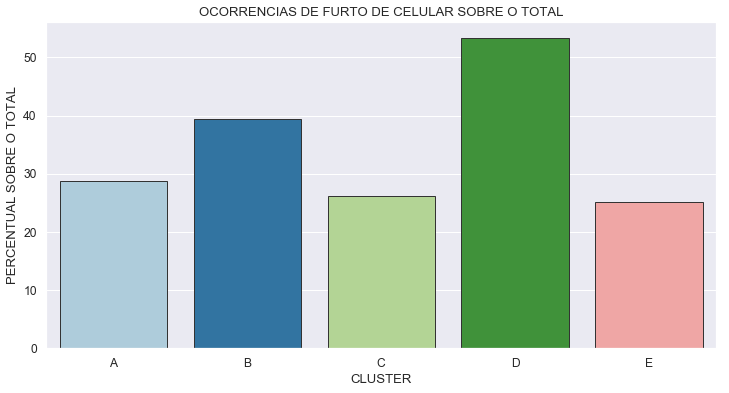

In [297]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

sns.barplot(x='CLUSTER',y='PERC_TIPO_FURTO DE CELULAR',data = apoio,ax=ax,edgecolor=".2",
             palette="Paired")
ax.set_ylabel('PERCENTUAL SOBRE O TOTAL')
ax.set_title('OCORRENCIAS DE FURTO DE CELULAR SOBRE O TOTAL')


Text(0.5,1,'OCORRENCIAS DE ROUBO DE CELULAR SOBRE O TOTAL')

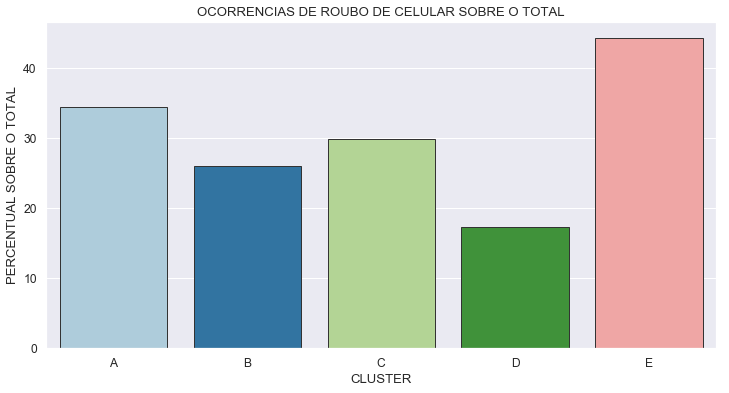

In [298]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

sns.barplot(x='CLUSTER',y='PERC_TIPO_ROUBO DE CELULAR',data = apoio,ax=ax,edgecolor=".2",
             palette="Paired")
ax.set_ylabel('PERCENTUAL SOBRE O TOTAL')
ax.set_title('OCORRENCIAS DE ROUBO DE CELULAR SOBRE O TOTAL')


In [317]:
df['CLUSTER'] = kmeans.predict(df[['LATITUDE','LONGITUDE']])

In [320]:
df3 = pd.get_dummies(df,columns=['TIPO'])

In [321]:
df3 = df3.groupby(['CLUSTER','PERIDOOCORRENCIA']).agg({'TIPO_FURTO DE CELULAR':'sum',
                      'TIPO_FURTO DE VEÍCULOS':'sum',
                       'TIPO_ROUBO DE CELULAR':'sum',
                       'TIPO_ROUBO DE VEÍCULOS':'sum',}).reset_index()

In [324]:
df3['total'] = df3[['TIPO_FURTO DE CELULAR',
       'TIPO_FURTO DE VEÍCULOS', 'TIPO_ROUBO DE CELULAR',
       'TIPO_ROUBO DE VEÍCULOS']].sum(1)

In [325]:
df3 = pd.merge(df3,df3.groupby('CLUSTER').agg({'total':'sum'}).reset_index(),how='left',on='CLUSTER',suffixes=('','_c'))

In [329]:
for i in ['TIPO_FURTO DE CELULAR',
       'TIPO_FURTO DE VEÍCULOS', 'TIPO_ROUBO DE CELULAR',
       'TIPO_ROUBO DE VEÍCULOS']:
    df3['PERC_'+i] = df3[i]/df3['total_c']*100

In [330]:
df3

,CLUSTER,PERIDOOCORRENCIA,TIPO_FURTO DE CELULAR,TIPO_FURTO DE VEÍCULOS,TIPO_ROUBO DE CELULAR,TIPO_ROUBO DE VEÍCULOS,total,total_c,PERC_TIPO_FURTO DE CELULAR,PERC_TIPO_FURTO DE VEÍCULOS,PERC_TIPO_ROUBO DE CELULAR,PERC_TIPO_ROUBO DE VEÍCULOS
0,0,A NOITE,2174.0,2447.0,5172.0,1477.0,11270.0,31155.0,6.978013,7.854277,16.600867,4.740812
1,0,A TARDE,2780.0,1610.0,2127.0,680.0,7197.0,31155.0,8.923126,5.167710,6.827155,2.182635
2,0,DE MADRUGADA,1181.0,1279.0,1471.0,487.0,4418.0,31155.0,3.790724,4.105280,4.721554,1.563152
3,0,EM HORA INCERTA,671.0,640.0,42.0,12.0,1365.0,31155.0,2.153747,2.054245,0.134810,0.038517
4,0,PELA MANHÃ,2160.0,2118.0,1932.0,695.0,6905.0,31155.0,6.933077,6.798267,6.201252,2.230782
5,1,A NOITE,3869.0,2831.0,4355.0,1566.0,12621.0,37149.0,10.414816,7.620663,11.723061,4.215457
6,1,A TARDE,3899.0,1981.0,2023.0,460.0,8363.0,37149.0,10.495572,5.332580,5.445638,1.238257
7,1,DE MADRUGADA,2576.0,1634.0,1460.0,580.0,6250.0,37149.0,6.934238,4.398503,3.930119,1.561280
8,1,EM HORA INCERTA,1389.0,1680.0,45.0,10.0,3124.0,37149.0,3.738997,4.522329,0.121134,0.026919
9,1,PELA MANHÃ,2905.0,1724.0,1795.0,367.0,6791.0,37149.0,7.819861,4.640771,4.831893,0.987914


In [336]:
df3['PERIDOOCORRENCIA'].unique()

array(['A NOITE', 'A TARDE', 'DE MADRUGADA', 'EM HORA INCERTA',
       'PELA MANHÃ'], dtype=object)

Text(0.5,1,'OCORRENCIAS DE ROUBO DE CELULAR SOBRE O TOTAL')

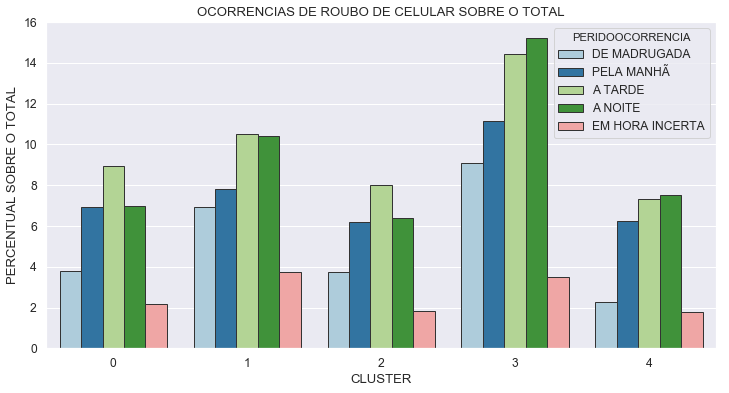

In [337]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

sns.barplot(x='CLUSTER',y='PERC_TIPO_FURTO DE CELULAR',data = df3,ax=ax,edgecolor=".2", hue='PERIDOOCORRENCIA',
             palette="Paired",hue_order=['DE MADRUGADA','PELA MANHÃ','A TARDE','A NOITE','EM HORA INCERTA'])
ax.set_ylabel('PERCENTUAL SOBRE O TOTAL')
ax.set_title('OCORRENCIAS DE ROUBO DE CELULAR SOBRE O TOTAL')


C:\Users\Administrator\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


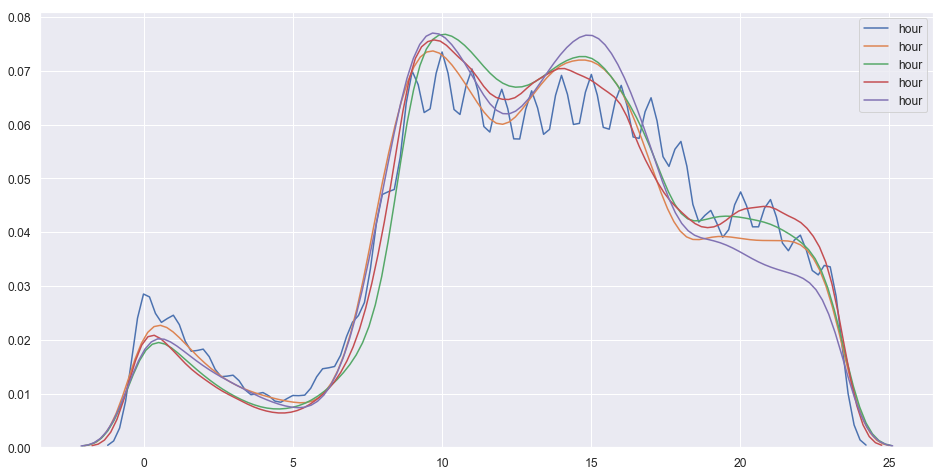

In [355]:
df2['hour'] = df2['BO_INICIADO'].dt.hour
fig, ax = plt.subplots(1,1,figsize=(16,8))

c = 0
for n in df2['CLUSTER'].unique():
    df_filter = df2[df2['CLUSTER'] == n]
    sns.kdeplot(df_filter['hour'],ax=ax)


In [352]:
pd.get_dummies(df2,columns=['hour']).groupby('CLUSTER').agg({ 'hour_0':'sum', 'hour_1':'sum', 'hour_2':'sum',
       'hour_3':'sum', 'hour_4':'sum', 'hour_5':'sum', 'hour_6':'sum', 'hour_7':'sum', 'hour_8':'sum', 'hour_9':'sum',
       'hour_10':'sum', 'hour_11':'sum', 'hour_12':'sum', 'hour_13':'sum', 'hour_14':'sum', 'hour_15':'sum',
       'hour_16':'sum', 'hour_17':'sum', 'hour_18':'sum', 'hour_19':'sum', 'hour_20':'sum', 'hour_21':'sum',
       'hour_22':'sum', 'hour_23':'sum'})

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
CLUSTER,,,,,,,,,,,,,,,,,,,,,,,,
A,749.0,574.0,400.0,291.0,214.0,211.0,292.0,485.0,699.0,2380.0,2476.0,2300.0,2042.0,2085.0,2242.0,2318.0,2097.0,1790.0,1181.0,1375.0,1334.0,1303.0,1208.0,1109.0
B,1008.0,806.0,567.0,423.0,354.0,303.0,271.0,670.0,1892.0,2807.0,2802.0,2427.0,2071.0,2453.0,2700.0,2674.0,2579.0,1969.0,1306.0,1494.0,1446.0,1409.0,1459.0,1259.0
C,2543.0,1753.0,1243.0,940.0,658.0,605.0,933.0,1617.0,3716.0,7832.0,7695.0,7070.0,6287.0,6839.0,7246.0,6881.0,6582.0,5051.0,4393.0,3961.0,4548.0,4510.0,4280.0,3785.0
D,698.0,555.0,416.0,335.0,253.0,196.0,186.0,515.0,1336.0,2248.0,2264.0,1970.0,1636.0,1857.0,2101.0,2265.0,2063.0,1597.0,1048.0,1138.0,1027.0,938.0,919.0,872.0
E,20479.0,16531.0,12214.0,8958.0,6765.0,6325.0,9769.0,15224.0,31697.0,47611.0,49532.0,47203.0,44552.0,44395.0,46536.0,46675.0,45257.0,43933.0,38523.0,29141.0,32164.0,31264.0,26573.0,23808.0
